In [1]:
from fastbook import *
from fastai.vision.widgets import *

from duckduckgo_search import ddg_images

from fastai.vision.all import *
from fastcore.all import *

from fastdownload import download_url

from IPython.core.pylabtools import figsize 



In [2]:
from time import sleep

In [3]:
!pip install -Uqq fastai duckduckgo_search

In [4]:
def search_images(term, max_images=30):    #Returns a list of links that match the search string
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [4]:
term = 'dog photo'
urls = search_images(term, max_images=1)
urls[0]

Searching for 'dog photo'


'https://jooinn.com/images/dog-67.jpg'

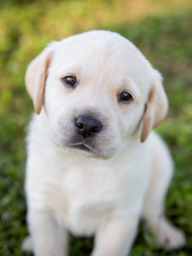

In [5]:
dest = 'dog.jpg'
download_url(urls[0], dest, show_progress=False)


im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'wolf photos'


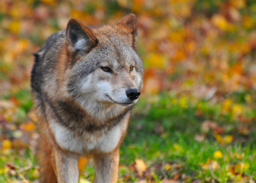

In [6]:
download_url(search_images('wolf photos', max_images=1)[0], 'wolf.jpg', show_progress=False)
Image.open('wolf.jpg').to_thumb(256,256)

In [5]:
searches = 'wolf','dog','fox'
path = Path('dog_wolf_fox')

In [27]:
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(2)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} single photo'))
    sleep(2)
    download_images(dest, urls=search_images(f'{o} group photo'))
    sleep(2)
    resize_images(path/o, max_size=400, dest=path/o)

dest = (path/'dog')
dest.mkdir(exist_ok=True, parents=True)
download_images(dest, urls=search_images('dalmation'))
sleep(2)  # Pause between searches to avoid over-loading server
download_images(dest, urls=search_images(f'{o} camouflage'))
sleep(2)
download_images(dest, urls=search_images(f'{o} husky'))
sleep(2)
resize_images(path/o, max_size=400, dest=path/o)

Searching for 'wolf photo'
Searching for 'wolf single photo'
Searching for 'wolf group photo'
Searching for 'dog photo'
Searching for 'dog single photo'
Searching for 'dog group photo'
Searching for 'fox photo'
Searching for 'fox single photo'
Searching for 'fox group photo'
Searching for 'dalmation'
Searching for 'fox camouflage'
Searching for 'fox husky'


In [28]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

5

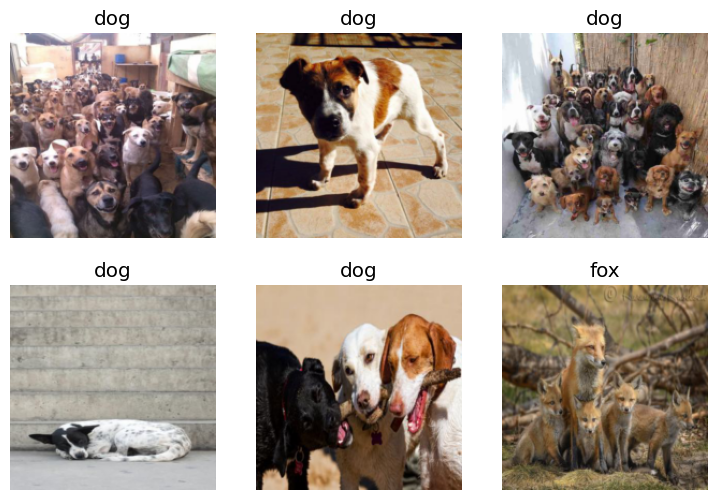

In [14]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.4, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [15]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.365808,0.307198,0.081633,00:28


epoch,train_loss,valid_loss,error_rate,time
0,0.466056,0.271191,0.081633,00:34
1,0.301551,0.228954,0.068027,00:34
2,0.203495,0.174443,0.054422,00:34
3,0.152473,0.158097,0.054422,00:34


In [31]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.027259,0.552662,0.138889,00:41


epoch,train_loss,valid_loss,error_rate,time
0,0.030636,0.592589,0.127778,00:54


This is an image of: wolf(s).
Probability it's a wolf: 0.0000


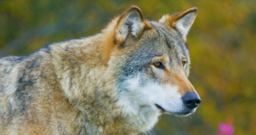

In [18]:
p = r'dog_wolf_fox\wolf\2ddc2007-ce7a-455a-8d4c-42bda6d76d13.png'
is_bird,_,probs = learn.predict(PILImage.create(p))
print(f"This is an image of: {is_bird}(s).")
print(f"Probability it's a {is_bird}: {probs[0]:.4f}")
Image.open(p).to_thumb(256,256)

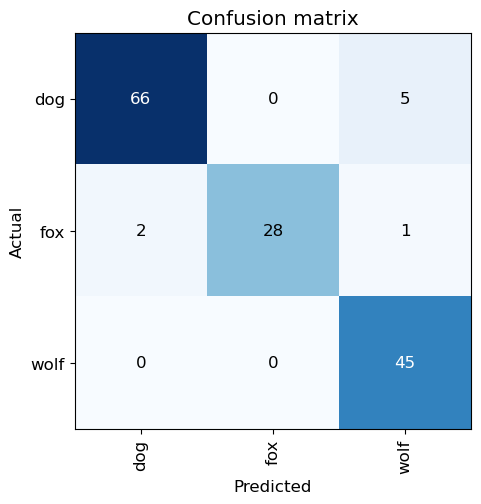

In [19]:
interp = ClassificationInterpretation.from_learner(learn) 
interp.plot_confusion_matrix(figsize=(5,5))

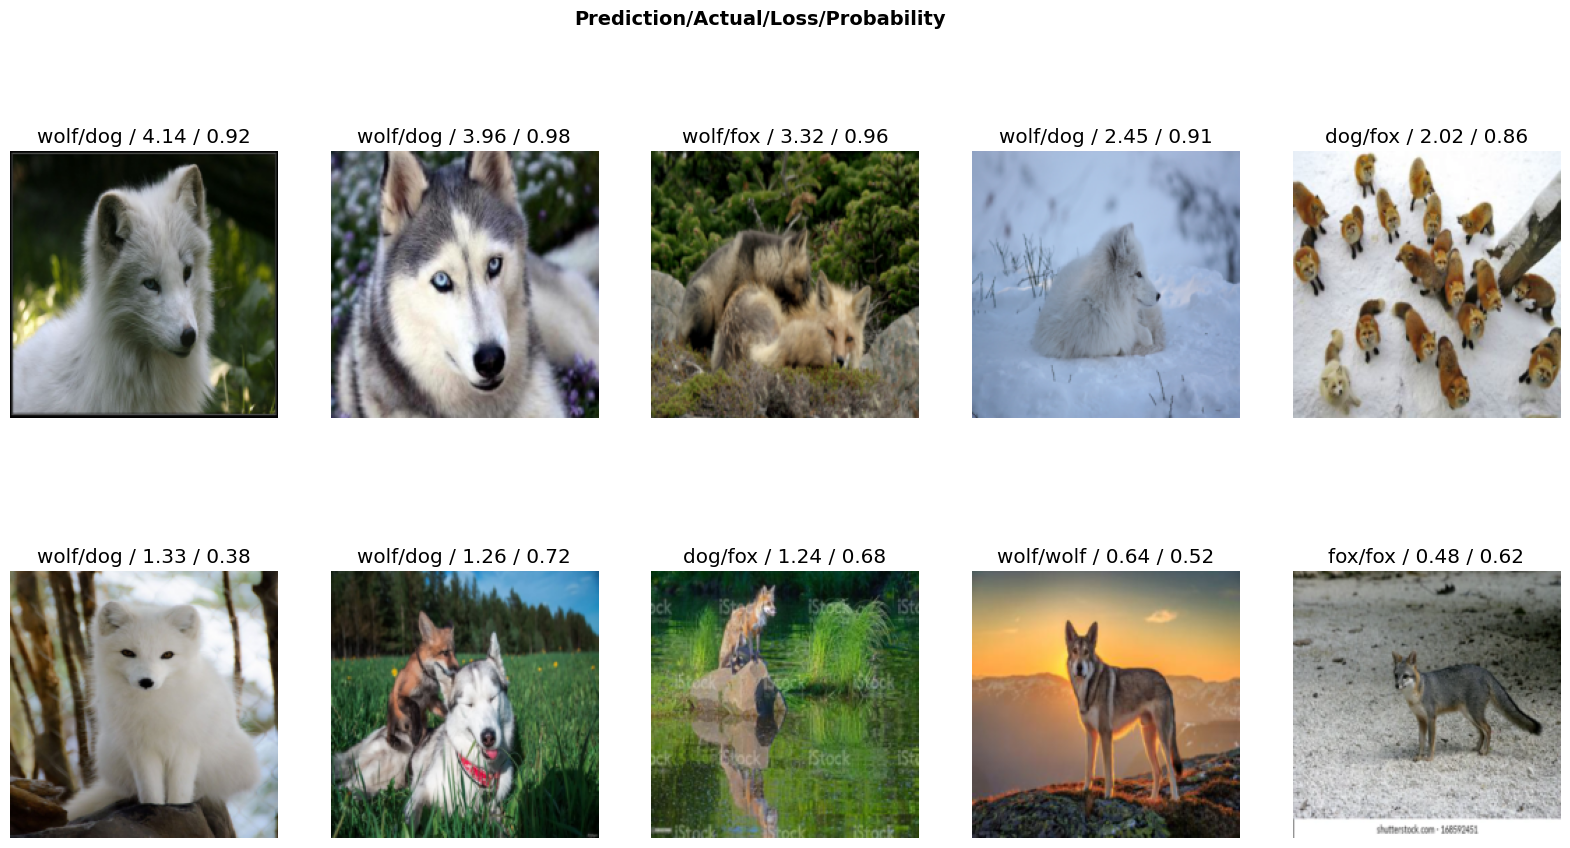

In [20]:
interp.plot_top_losses(10, nrows=2, figsize=(20,10))

In [ ]:
learn.export(fname='dog_wolf_fox_classifier.pkl')

In [21]:
learn.summary()

Sequential (Input shape: 32 x 3 x 192 x 192)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 96 x 96   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 48 x 48   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      